# Data augmentation
I will create two augmented datasets: 1. using only affine transformations, 2. using both affine transformations and a GAN. Then I will use the main dataset and those two augmented datasets to train a deep learning model to recognize digits and will compare how their performances.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from keras.datasets.mnist import load_data
(X_train, y_train), (X_test, y_test) = load_data()
X_train, X_valid = X_train[:55000], X_train[55000:]
y_train, y_valid = y_train[:55000], y_train[55000:]
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((55000, 28, 28), (5000, 28, 28), (55000,), (5000,))

## Pixel shifting

In [8]:
from scipy.ndimage.interpolation import shift, rotate, zoom
from scipy.ndimage import gaussian_filter

In [9]:
def shift_image(image, low = -5, high = 5):
    """
    This function shifts an image along x and y based on two random shift values.
    """
    dy = np.random.randint(low, high)
    while dy == 0:
        dy = np.random.randint(low, high)
    dx = np.random.randint(low, high)
    while dx == 0:
        dx = np.random.randint(low, high)
    return shift(image, [dy, dx])

## Rotation

In [10]:
def rotate_image(image, low = -30, high = 30):
    """
    This function rotates and returns an image.
    """
    angle = np.random.randint(low, high)
    while angle >= -5 and angle <= 5:
        angle = np.random.randint(low, high)
    return rotate(image, angle, reshape = False)

## Zoom in and out

In [11]:
def zoom_in_out(image, ratio = (1.1, 0.8)):
    """
    This function randomly zooms in or out an image and then returns that image.
    """
    random_choice = np.random.randint(0, 2)
    if random_choice == 0:
        zoomed_image = zoom(image, ratio[0])
        zoomed_image = np.delete(zoomed_image, [i for i in range (zoomed_image.shape[0] - 28)], 0)
        zoomed_image = np.delete(zoomed_image, [i for i in range (zoomed_image.shape[1] - 28)], 1)
    elif random_choice == 1:
        zoomed_image = zoom(image, ratio[1])
        zoomed_image = np.append(zoomed_image, np.zeros((zoomed_image.shape[0], 28 - zoomed_image.shape[1])), axis = 1)
        zoomed_image = np.append(zoomed_image, np.zeros((28 - zoomed_image.shape[0], zoomed_image.shape[1])), axis = 0)
    return zoomed_image

## Blurring

In [12]:
def blur(image, sigma = 1):
    """
    Blurs a given image.
    """
    return gaussian_filter(image, sigma)

## Plot function for images

In [13]:
def plot_images(data, num_rows = 2, num_cols = 5, index_low = 0, index_high = 100):
    fig, axs = plt.subplots(num_rows, num_cols)
    fig.set_figwidth(15)
    fig.set_figheight(6)
    for row in range(num_rows):
        for col in range(num_cols):
            index = np.random.randint(index_low, index_high)
            axs[row, col].imshow(data[index], cmap = "binary")
            axs[row, col].axis("off")
    plt.subplots_adjust(wspace = 0.1, hspace = 0.1)
    plt.show()

## Performing data augmentation (only affine transformations and blurring)

In [14]:
aug_data = X_train.copy()
aug_labels = y_train.copy()

## Shifting images for DA

In [15]:
random_indices = random.sample([i for i in range(len(X_train[:]))], k = int(len(X_train[:])/8))

In [16]:
for index in random_indices:
    shifted_image = shift_image(X_train[index], low = -5, high = 5).reshape((1, 28, 28))
    aug_data = np.concatenate((aug_data, shifted_image), axis = 0)
    aug_labels = np.append(aug_labels, y_train[index])
%store aug_data aug_labels

Stored 'aug_data' (ndarray)
Stored 'aug_labels' (ndarray)


In [17]:
aug_data.shape, aug_labels.shape

((61875, 28, 28), (61875,))

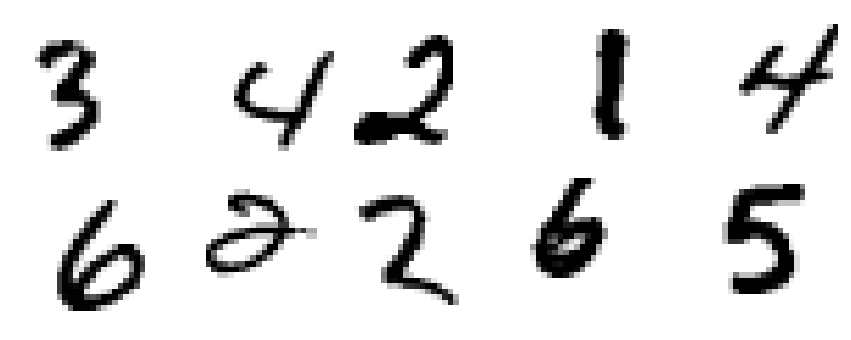

In [18]:
plot_images(aug_data, 2, 5, len(X_train), len(aug_data))

## Rotating images for DA

In [20]:
random_indices = random.sample([i for i in range(len(X_train[:]))], k = int(len(X_train[:])/8))

In [21]:
for index in random_indices:
    rotated_image = rotate_image(X_train[index], low = -30, high = 30).reshape((1, 28, 28))
    aug_data = np.concatenate((aug_data, rotated_image), axis = 0)
    aug_labels = np.append(aug_labels, y_train[index])
%store aug_data aug_labels

Stored 'aug_data' (ndarray)
Stored 'aug_labels' (ndarray)


In [22]:
aug_data.shape, aug_labels.shape

((68750, 28, 28), (68750,))

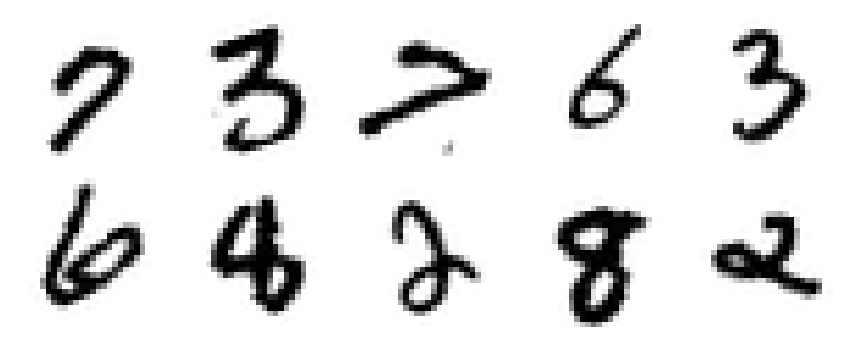

In [23]:
plot_images(aug_data, 2, 5, 61875, len(aug_data))

## Zooming in and out for DA

In [24]:
random_indices = random.sample([i for i in range(len(X_train[:]))], k = int(len(X_train[:])/8))

In [25]:
for index in random_indices:
    zoomed_image = zoom_in_out(X_train[index], ratio = (1.1, 0.8)).reshape((1, 28, 28))
    aug_data = np.concatenate((aug_data, zoomed_image), axis = 0)
    aug_labels = np.append(aug_labels, y_train[index])
%store aug_data aug_labels

C:\Users\HP\anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:608: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  warnings.warn(


Stored 'aug_data' (ndarray)
Stored 'aug_labels' (ndarray)


In [26]:
aug_data.shape, aug_labels.shape

((75625, 28, 28), (75625,))

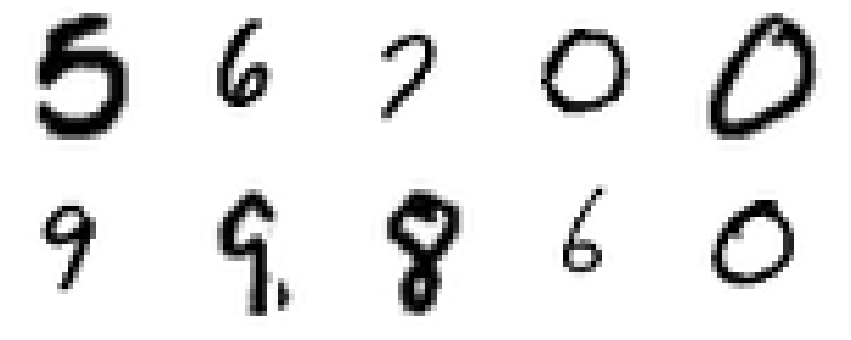

In [27]:
plot_images(aug_data, 2, 5, 68750, len(aug_data))

## Blurring images for DA

In [28]:
random_indices = random.sample([i for i in range(len(X_train[:]))], k = int(len(X_train[:])/8))

In [29]:
for index in random_indices:
    blurred_image = blur(X_train[index], sigma = 1).reshape((1, 28, 28))
    aug_data = np.concatenate((aug_data, blurred_image), axis = 0)
    aug_labels = np.append(aug_labels, y_train[index])
%store aug_data aug_labels

Stored 'aug_data' (ndarray)
Stored 'aug_labels' (ndarray)


In [30]:
aug_data.shape, aug_labels.shape

((82500, 28, 28), (82500,))

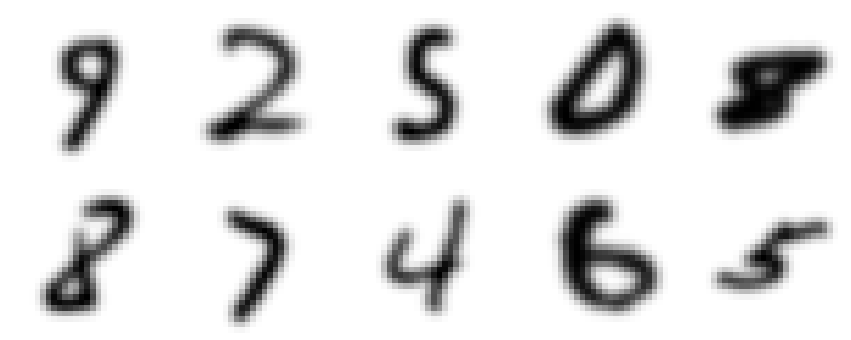

In [31]:
plot_images(aug_data, 2, 5, 75625, len(aug_data))

## Building the augmented dataset (only affine transformations)

In [111]:
aug_data_affines = aug_data.reshape(len(aug_data), 28*28).copy()
aug_labels_affines = aug_labels.reshape(len(aug_labels), 1).copy()
aug_data_affines.shape, aug_labels_affines.shape

((82500, 784), (82500, 1))

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
aug_data_affines = scaler.fit_transform(aug_data_affines)
aug_data_affines.min(), aug_data_affines.max(), aug_data_affines.shape

(0.0, 1.0, (82500, 784))

In [113]:
aug_dataset_affines = np.concatenate((aug_data_affines.reshape(len(aug_data_affines), 28*28), aug_labels_affines.reshape(len(aug_labels_affines), 1)), axis = 1)

In [114]:
np.random.shuffle(aug_dataset_affines)

In [115]:
aug_dataset_affines.shape

(82500, 785)

In [116]:
import pandas as pd
df = pd.DataFrame(aug_dataset_affines)
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
82496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
82497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
82498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [117]:
df.to_csv("C:/Users/HP/OneDrive/Documents/datasets/aug_dataset_affines.csv")

In [123]:
aug_data.shape, aug_labels.shape

((82500, 28, 28), (82500,))

In [124]:
%store aug_data aug_labels

Stored 'aug_data' (ndarray)
Stored 'aug_labels' (ndarray)
